#  Positioning Analysis Survey: Consumer Perceptions of Energy Providers

Our **positioning analysis survey** was designed to assess consumer perceptions of four key attributes across four energy providers. Respondents were asked to rate each attribute on a scale from **1 to 10**.

##  Attributes Evaluated:
1. **Transparency** (Clear pricing, no hidden costs)
2. **Energy from Renewable Sources**
3. **Customer Service**
4. **Reputation and Reliability of the Provider**

---

##  Survey Structure:
The survey was structured in a **column format** for each energy provider. For example, the questions for **A2A** were:

- **A2A** - Rate each attribute from **1 to 10**  
  - *Transparency (Clear pricing, no hidden costs)*  
  - *Energy from Renewable Sources*  
  - *Customer Service*  
  - *Reputation and Reliability of the Provider*  

A similar format was applied to the other providers: **ENEL, Octopus Energy, and Sorgenia**, ensuring a consistent approach across all brands.

---

##  Language Considerations:
The survey was **originally conducted in Italian** to align with our target market. It was later **translated into English** to facilitate broader understanding and analysis.



In [8]:
# Import necessary libraries and disable warnings
import warnings
warnings.filterwarnings("ignore")  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset from CSV and display its columns
file_path = "positioning.csv"
df = pd.read_csv(file_path)
#print("Dataset Columns:\n", df.columns)
# Remove the timestamp column
df = df.iloc[:, 1:]


##  Data Filtering: Removing Incomplete Responses

In this step, we **filter out rows where the highest value is not greater than 3**. 

###  **Why is this necessary?**
- If the **maximum value in a row is only 3**, it suggests that the respondent **did not properly scroll through all available options**.
- This filtering ensures that **only complete and valid responses** are included in the analysis.

By applying this filter, we improve the **accuracy and reliability** of our dataset.


In [9]:
# Identify the maximum value in each row
max_values = df.max(axis=1)

# Filter out rows where the maximum value is not greater than 3
filtered_df = df[max_values > 3]


In [10]:
# Define provider names
providers = ["A2A", "ENEL", "Octopus Energy", "Sorgenia"]

# Italian attribute names (used for matching columns in the dataset)
attributes_it = [
    "Trasparenza", 
    "Energia da fonti rinnovabili", 
    "Servizio clienti", 
    "Reputazione e affidabilità"
]

# Corresponding English attribute labels for plotting
attributes_en = [
    "Transparency", 
    "Renewable Energy", 
    "Customer Service", 
    "Reputation & Reliability"
]


##  Next Step: Calculating Min, Max, and Avg Scores  

To gain deeper insights into consumer perceptions, we **calculated the following statistics** for each attribute across all energy providers:  

###  **Metrics Computed:**  
- **Minimum Score (Min):**  The lowest rating received for each attribute.  
- **Maximum Score (Max):**  The highest rating received for each attribute.  
- **Average Score (Avg):**  The mean rating, representing overall consumer perception.  

###  **Why is this important?**  
- The **Min and Max values** help identify **outliers** and the range of consumer opinions.  
- The **Avg score** provides a **generalized perception** of each provider’s performance.  

###  **Next Steps:**  
We will use these computed values to refine our **comparative analysis** and identify the **strongest and weakest attributes** for each energy provider.  


In [11]:
# Initialize a dictionary to store statistics for each provider
stats = {provider: {} for provider in providers}

# Loop through each provider and attribute to compute statistics
for provider in providers:
    for attribute in attributes_it:
        # Identify the column that contains both the provider and attribute name
        matching_cols = [col for col in filtered_df.columns if provider in col and attribute in col]
        if matching_cols:
            col_name = matching_cols[0]
            stats[provider][attribute] = {
                "min": filtered_df[col_name].min(),
                "avg": filtered_df[col_name].mean(),
                "max": filtered_df[col_name].max()
            }



--- Provider Statistics ---

A2A:
  Trasparenza: min = 1.00, avg = 5.12, max = 8.00
  Energia da fonti rinnovabili: min = 1.00, avg = 5.85, max = 10.00
  Servizio clienti: min = 1.00, avg = 5.68, max = 9.00
  Reputazione e affidabilità: min = 1.00, avg = 7.03, max = 10.00

ENEL:
  Trasparenza: min = 1.00, avg = 5.26, max = 9.00
  Energia da fonti rinnovabili: min = 1.00, avg = 5.91, max = 9.00
  Servizio clienti: min = 1.00, avg = 5.79, max = 9.00
  Reputazione e affidabilità: min = 2.00, avg = 7.53, max = 10.00

Octopus Energy:
  Trasparenza: min = 1.00, avg = 6.06, max = 10.00
  Energia da fonti rinnovabili: min = 1.00, avg = 6.53, max = 10.00
  Servizio clienti: min = 1.00, avg = 7.15, max = 10.00
  Reputazione e affidabilità: min = 1.00, avg = 5.79, max = 10.00

Sorgenia:
  Trasparenza: min = 1.00, avg = 5.91, max = 10.00
  Energia da fonti rinnovabili: min = 2.00, avg = 7.35, max = 10.00
  Servizio clienti: min = 2.00, avg = 6.24, max = 10.00
  Reputazione e affidabilità: min = 2

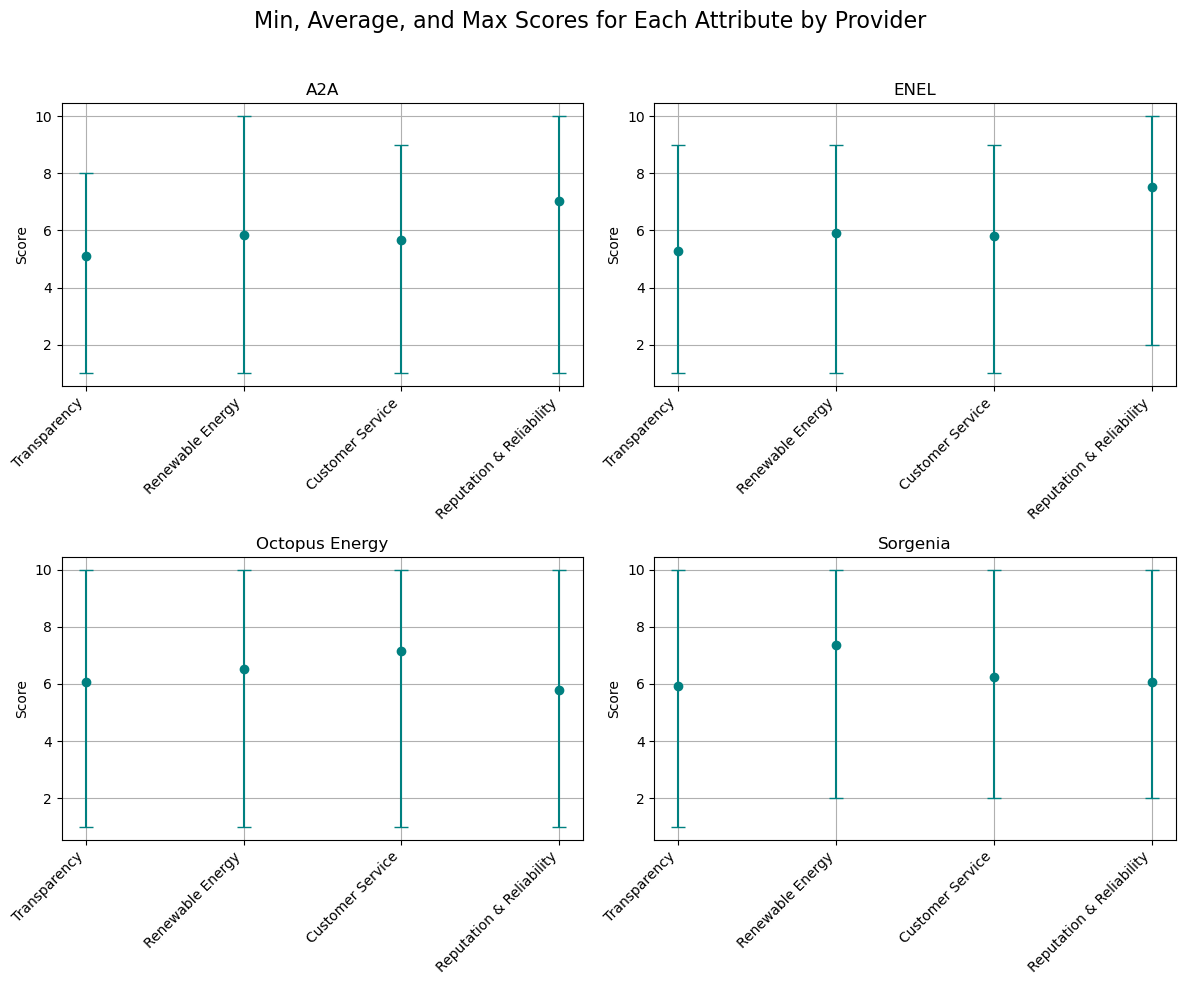

In [12]:
# -------------------------------------------------
# Print computed statistics to the console
# -------------------------------------------------
print("\n--- Provider Statistics ---")
for provider in providers:
    print(f"\n{provider}:")
    for attribute in attributes_it:
        if attribute in stats[provider]:
            stat = stats[provider][attribute]
            print(f"  {attribute}: min = {stat['min']:.2f}, avg = {stat['avg']:.2f}, max = {stat['max']:.2f}")
        else:
            print(f"  {attribute}: No data available.")

# -------------------------------------------------
# Visualization 1: Min, Average, and Max for Each Provider and Attribute
# -------------------------------------------------
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()
for i, provider in enumerate(providers):
    # Extract the statistics for all attributes for this provider using the Italian attribute names
    provider_stats = [stats[provider][attr] for attr in attributes_it if attr in stats[provider]]
    avg_values = [d["avg"] for d in provider_stats]
    min_values = [d["min"] for d in provider_stats]
    max_values = [d["max"] for d in provider_stats]
    # Calculate error bars: distance from average to min and max
    error_lower = [avg - mn for avg, mn in zip(avg_values, min_values)]
    error_upper = [mx - avg for avg, mx in zip(avg_values, max_values)]
    errors = [error_lower, error_upper]
    
    x = np.arange(len(avg_values))
    axs[i].errorbar(x, avg_values, yerr=errors, fmt='o', capsize=5, color='teal')
    # Use English labels for the x-ticks (select only as many labels as data points)
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(attributes_en[:len(avg_values)], rotation=45, ha="right", fontsize=10)
    axs[i].set_title(provider, fontsize=12)
    axs[i].set_ylabel("Score", fontsize=10)
    axs[i].grid(True)

fig.suptitle("Min, Average, and Max Scores for Each Attribute by Provider", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#  Energy Providers Comparison: Average Scores by Category

##  Transparency (Clear Pricing, No Hidden Costs)
| Provider            | Avg Score                          |
|---------------------|------------------------------------|
| **Octopus Energy**  | 🟢 **6.06** (Highest)              |
| Sorgenia            | 🟡 5.91                           |
| ENEL                | 🟡 5.26                           |
| A2A                 | 🔴 **5.12** (Lowest)               |

Octopus Energy demonstrates the highest transparency with clear pricing and minimal hidden costs, whereas A2A scores the lowest in this area.

---

##  Renewable Energy Usage
| Provider            | Avg Score                          |
|---------------------|------------------------------------|
| **Sorgenia**       | 🟢 **7.35** (Highest)              |
| Octopus Energy      | 🟡 6.53                           |
| ENEL                | 🟡 5.91                           |
| A2A                 | 🔴 **5.85** (Lowest)               |

Sorgenia leads in the use of renewable energy, reflecting a strong commitment to sustainability. In contrast, A2A lags behind its competitors.

---

##  Customer Service
| Provider            | Avg Score                          |
|---------------------|------------------------------------|
| **Octopus Energy**  | 🟢 **7.15** (Highest)              |
| Sorgenia            | 🟡 6.24                           |
| ENEL                | 🟡 5.79                           |
| A2A                 | 🔴 **5.68** (Lowest)               |

Octopus Energy excels in customer service, providing highly responsive and effective support, while A2A receives the lowest score in this category.

---

##  Reputation & Reliability
| Provider            | Avg Score                          |
|---------------------|------------------------------------|
| **ENEL**           | 🟢 **7.53** (Highest)              |
| A2A                 | 🟡 7.03                           |
| Sorgenia            | 🟡 6.06                           |
| Octopus Energy      | 🔴 **5.79** (Lowest)               |

ENEL stands out with the highest reputation and reliability, likely due to its strong market presence. Octopus Energy, however, scores the lowest in this area.

---

##  Continuing Our Positioning Analysis  

To further analyze consumer perceptions, we **apply Principal Component Analysis (PCA)** to reduce the dataset to **two dimensions**.  

###  **Why PCA?**  
- PCA helps **simplify complex data** while preserving key differences.  
- The reduced data will be used to create a **positioning map**, allowing for a **clear visual comparison** of energy providers.  

###  **Visualizing the Results**  
1. **Radar Chart:** We define and display a **radar chart** for energy providers using the **English attribute labels**, providing an intuitive comparison of their strengths and weaknesses.  
2. **Positioning Map:** A **2D plot** based on PCA results to illustrate how energy providers are perceived relative to each other.  

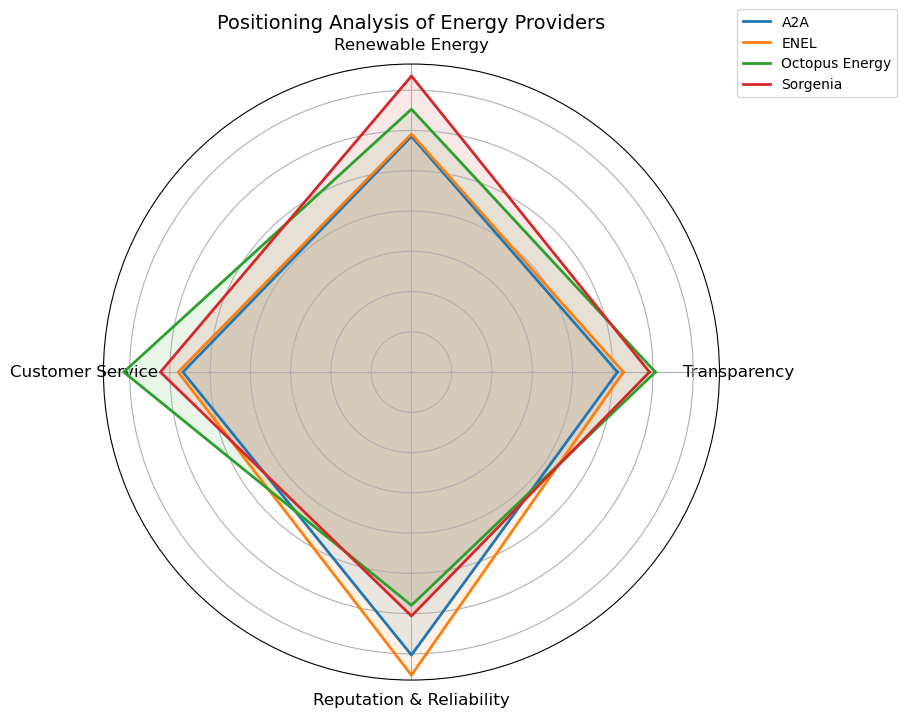

In [13]:
positioning_data = {}
for provider in providers:
    # Select all columns corresponding to the provider
    provider_columns = [col for col in filtered_df.columns if provider in col]
    avg_scores = filtered_df[provider_columns].mean().values
    positioning_data[provider] = avg_scores

# Create a DataFrame for positioning data, initially using Italian attribute names as index
positioning_df = pd.DataFrame(positioning_data, index=attributes_it)

# Update the DataFrame index to use English attribute labels for visualization
positioning_df.index = attributes_en

# Perform PCA to reduce dimensions to 2D for the positioning map
pca = PCA(n_components=2)
positioning_2d = pca.fit_transform(positioning_df.T)

# Function to plot a radar chart for the positioning analysis
def plot_radar_chart(positioning_df):
    labels = positioning_df.index  # English labels
    num_vars = len(labels)
    
    # Compute the angles for each axis in the plot
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop
    
    # Initialize the radar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    # Plot each provider's data on the radar chart
    for provider, values in positioning_df.items():
        vals = list(values) + [values[0]]  # Ensure the polygon is closed
        ax.plot(angles, vals, label=provider, linewidth=2)
        ax.fill(angles, vals, alpha=0.1)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_yticklabels([])
    ax.set_title("Positioning Analysis of Energy Providers", fontsize=14)
    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
    plt.show()

# Display the radar chart
plot_radar_chart(positioning_df)


##  Radar Chart Analysis: Energy Provider Comparison  

The **radar chart confirms the insights** observed earlier when comparing the **average scores** of each provider across key attributes.  

###  **Key Findings:**  

- **Best Performers:**  
  - **Transparency:**  *Octopus Energy* leads with the highest score.  
  - **Renewable Energy:**  *Sorgenia* stands out with the strongest commitment.  
  - **Customer Service:**  *Octopus Energy* ranks highest in responsiveness.  
  - **Reputation & Reliability:**  *ENEL* holds the strongest reputation.  

- **Lowest Scores:**  
  - **Transparency:**  *A2A* ranks the lowest, indicating concerns over pricing clarity.  
  - **Renewable Energy:**  *A2A* also lags behind in green energy adoption.  
  - **Customer Service:**  *A2A* scores the lowest in customer support.  
  - **Reputation & Reliability:**  *Octopus Energy* has the weakest market reputation.  

###  **Conclusion:**  
Each provider has **distinct strengths and weaknesses**, making it essential for consumers to choose based on their priorities—whether they value **pricing transparency, sustainability, service quality, or brand reliability**.  


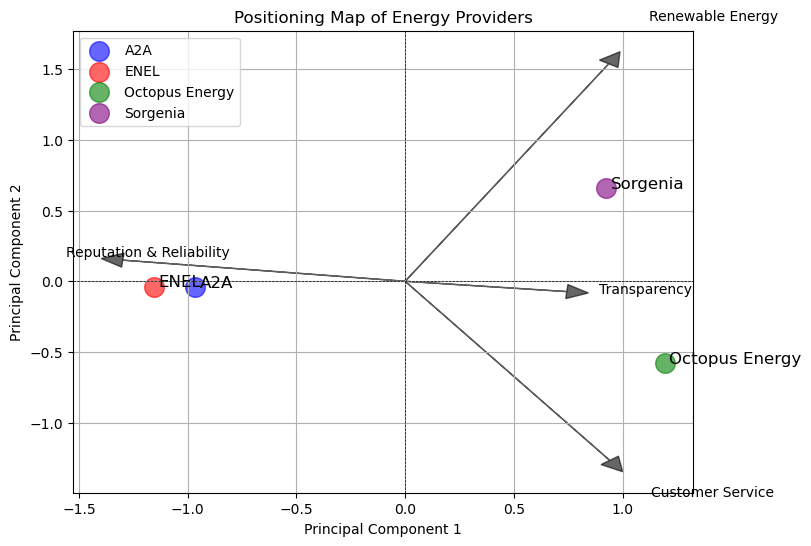

In [14]:
# Convert PCA results into a DataFrame for easier plotting
positioning_2d_df = pd.DataFrame(positioning_2d, index=providers, columns=["PC1", "PC2"])

# Initialize the positioning map plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each provider as a point in the 2D PCA space
colors = ["blue", "red", "green", "purple"]
for i, provider in enumerate(providers):
    ax.scatter(positioning_2d_df.loc[provider, "PC1"],
               positioning_2d_df.loc[provider, "PC2"],
               c=colors[i], s=200, alpha=0.6, label=provider)
    ax.text(positioning_2d_df.loc[provider, "PC1"] + 0.02,
            positioning_2d_df.loc[provider, "PC2"],
            provider, fontsize=12)

# Plot PCA loadings (feature contributions) as arrows
loadings = pca.components_.T  # Rows correspond to attributes
scaling_factor = 2  # Adjust arrow length for visualization

for i, attribute in enumerate(attributes_en):
    ax.arrow(0, 0,
             loadings[i, 0] * scaling_factor,
             loadings[i, 1] * scaling_factor,
             color='black', alpha=0.6,
             head_width=0.1, head_length=0.1)
    ax.text(loadings[i, 0] * scaling_factor * 1.2,
            loadings[i, 1] * scaling_factor * 1.2,
            attribute, fontsize=10)

# Add reference lines and labels
ax.axhline(0, color='black', linewidth=0.5, linestyle="--")
ax.axvline(0, color='black', linewidth=0.5, linestyle="--")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("Positioning Map of Energy Providers")
ax.legend(loc="best")
ax.grid(True)

plt.show()


##  Positioning Map Analysis  

The **positioning map** provides a **visual representation** of how energy providers are perceived based on their key attributes.  

###  **Key Observations:**  

- **🔵 A2A & 🔴 ENEL:**  
  - The position indicates:   
    - **Excellent scores in Reputation & Reliability**

- **🟢 Octopus Energy:**  
  - The place on the graph is due to:  
    - **High scores in Customer Service & Transparency**  
    - **Good performance in Renewable Energy**  

- **🟣 Sorgenia :**  
  - The location is characterized by:  
    - **High scores in both Transparency & Renewable Energy**  
    - **Good performance in Customer Service**

###  **Conclusion:**  
The **positioning map aligns with the radar chart insights**, reinforcing the idea that each provider has distinct strengths—whether in **brand reputation, sustainability, customer service, or pricing transparency**.  
